## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [857]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import linalg

## Please make sure that your code works with loading data from relative path only

i.e. ```pd.read_csv('./data/multi_var_lasso.csv')``` should not throw an error when we run the auto-grading scripts

In [858]:
data_multi = pd.read_csv('./data/multi_var_lasso.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 6)]
X_multi = np.array(data_multi[cols])
Y_multi = np.array(data_multi['y_gt'])

In [859]:
data_multi_class = pd.read_csv('./data/3_class_perceptron.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 3)]
X_multi_class = np.array(data_multi_class[cols])
Y_multi_class = np.array(data_multi_class['y_gt'])

In [860]:
def mse_multi_var(X, Y, w, b):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''

    ## TODO
    X1=np.matmul(X,w)
    Y1=Y-X1
    mse=0
    i=0
    for a in Y1:
        mse=mse+(a-b)*(a-b)
        i=i+1
    mse=mse/i
    ## END TODO

    return mse

In [861]:
def mse_regularized(X, Y, w, b, lamda):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''
    ## TODO
    X1=np.matmul(X,w)
    Y1=Y-X1
    mse=0
    i=0
    for a in Y1:
        mse=mse+(a-b)*(a-b)
        i=i+1
    mse=mse/i
    w2=0
    for a in w:
        w2=w2+a*a
    mse=mse+lamda*w2
    ## END TODO

    return mse

## Plot Graphs

- This function plots the ground truth curve in <font color=green>green</font> and the predicted function in <font color=red>red</font>

In [862]:
def plot_curves(w, b, x, y):
  x_gt = np.linspace(-1, 2, 50)
  y_gt = 1 - 3 * x_gt - 2 * x_gt ** 2 + 2.5 * x_gt ** 3
  # print(x_gt.shape,y_gt.shape)
  if len(w) == 1:
    y_fit = w * x_gt + b
  elif len(w) == 5:
    x_fit = x_gt
    for pow in range(2, 4):
      x_fit = np.vstack([x_fit, np.power(x_gt, pow)])

    x_fit = np.vstack([x_fit, np.power(x_gt, 2)])
    x_fit = np.vstack([x_fit, np.power(x_gt, 1)])
    
    y_fit = np.dot(w, x_fit) + b
  else:
    assert False, 'Pass a valid w'
  plt.plot(x_gt, y_gt, color="green", label='1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3')
  plt.plot(x_gt, y_fit, color='red', label="Fitted Function y = w.Tx + b")
  if len(x.shape) == 1:
    x_plot = np.vstack([x, np.ones(len(x))]).T
    # print (x_plot.shape, y.shape)
  else:
    x_plot = x
  plt.scatter(x_plot[:,0],y)
  plt.legend()
  plt.title("Ground Truth Function")
  plt.show()

In [863]:
def split_data(X, Y, train_ratio=0.6):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    ## TODO
    A=np.arange(X.shape[0])
    np.random.shuffle(A)
    X_train=X[A[0:math.floor(X.shape[0]*train_ratio)]]
    Y_train=Y[A[0:math.floor(Y.shape[0]*train_ratio)]]
    X_val=X[A[math.floor(X.shape[0]*train_ratio):X.shape[0]]]
    Y_val=Y[A[math.floor(X.shape[0]*train_ratio):X.shape[0]]]
    ## END TODO

    return X_train, Y_train, X_val, Y_val

# Lasso Regression

Validation loss if 2.0826001410973345
Training Loss loss if 1.5921182332276649
(5,) 0.0 (30, 5) (30,)


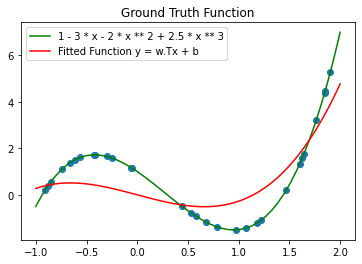

(array([-0.58196649,  0.        ,  0.88801881,  0.        , -0.58196649]), 0.0)

In [864]:
X_train, Y_train, X_val, Y_val = split_data(X_multi, Y_multi, train_ratio=0.6)

def ista(X_train, Y_train, X_val, Y_val, epochs=10000, lr=1e-2, lamda = 0.5):
    '''
    Perform multi variable lasso regression using ISTA

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    lamda - regularization_weight
    '''

    w = np.zeros(X_train.shape[1]) #np.random.randn(X_train.shape[1])
    b = 0
    ## TODO
    w1 = np.zeros(X_train.shape[1]+1)
    X1 = np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)
    for c in range(epochs):
        Y1=np.matmul(X1,w1)
        A = (2/X_train.shape[0])*np.matmul(np.transpose(X1),(Y_train-Y1))
        w1=w1+lr*A
        for d in range(w1.shape[0]):
            if(w1[d]>lamda*lr):
                w1[d]=w1[d]-lamda*lr
            elif(w1[d]<-1*lamda*lr):
                w1[d]=w1[d]+lamda*lr
            else:
                w1[d]=0
    w=w1[:X_train.shape[1]]
    b=w1[X_train.shape[1]]
    ## END TODO
    
    mse_train = mse_regularized(X_train, Y_train, w, b, lamda)
    mse_val = mse_regularized(X_val, Y_val, w, b, lamda)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    print(w.shape,b,X_train.shape,Y_train.shape)
    plot_curves(list(w), b, X_train, Y_train)
    return w, b

ista(X_train, Y_train, X_val, Y_val)

# Ridge Regression

Validation loss if 1.7283945468641082
Training Loss loss if 1.0224870589830137


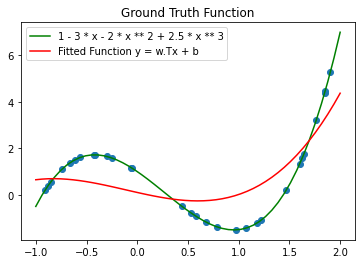

(array([-0.49109242,  0.11511922,  0.66465012,  0.11511922, -0.49109242]),
 0.10114937204570228)

In [865]:
def multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=0.5):

    '''
    Perform L2 regularized multi variable least squares regression using 
    closed form update rules

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    lambda - regularization weight
    '''

    w = np.zeros(X_train.shape[1])
    b = 0

    ## TODO     #use closed-form solution from previous assignment
    X1=np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)
    X1t=np.transpose(X1)
    h=(lamda*(X_train.shape[0]))*(np.identity(X_train.shape[1]+1))
    A=linalg.inv(np.matmul(X1t,X1)+h)
    B=np.matmul(A,X1t)
    ans=np.matmul(B,Y_train)
    w=ans[:X_train.shape[1]]
    b=ans[X_train.shape[1]]
    ## END TODO

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    
    return w, b

multivar_reg_closedform(X_train, Y_train, X_val, Y_val)

# Bias-Variance Tradeoff

In [866]:
#
def ridge(X_train, Y_train, X_test,epochs=20, lr=2e-1, lamda = 1):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    
    ## TODO
    w1 = np.array([w,b])
    w1=w1.reshape([-1,1])
    X1 = np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)
    for c in range(epochs):
        Y1=np.matmul(X1,w1)
        Y1=Y1.reshape([-1,1])
        A = (2/X_train.shape[0])*np.matmul(np.transpose(X1),(Y_train-Y1))
        w1=w1+lr*A-2*lamda*lr*w1
    w1=w1.reshape(-1)
    w=w1[0]
    b=w1[1]
    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

def lasso(X_train, Y_train, X_test,epochs=20, lr=2e-1, lamda = 1):
    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ##TODO
    w1 = np.array([w,b])
    w1=w1.reshape([-1,1])
    X1 = np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)
    for c in range(epochs):
        Y1=np.matmul(X1,w1)
        Y1=Y1.reshape([-1,1])
        A = (2/X_train.shape[0])*np.matmul(np.transpose(X1),(Y_train-Y1))
        w1=w1+lr*A
        for d in range(w1.shape[0]):
            if(w1[d]>lamda*lr):
                w1[d]=w1[d]-lamda*lr
            elif(w1[d]<-1*lamda*lr):
                w1[d]=w1[d]+lamda*lr
            else:
                w1[d]=0
    w1=w1.reshape(-1)
    w=w1[0]
    b=w1[1]
    ##END TODO

    Y_pred = w*X_test+b
    return Y_pred

def ols(X_train, Y_train, X_test,epochs=20, lr=2e-1):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ## TODO
    w1 = np.array([w,b])
    w1=w1.reshape([-1,1])
    X1 = np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)
    for c in range(epochs):
        Y1=np.matmul(X1,w1)
        Y1=Y1.reshape([-1,1])
        A = (2/X_train.shape[0])*np.matmul(np.transpose(X1),(Y_train-Y1))
        w1=w1+lr*A
    w1=w1.reshape(-1)
    w=w1[0]
    b=w1[1]
    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

In [867]:
# We fit multiple lines onto our linear model defined by y = c + mx + error.
num_lines = 10
#size of Dataset, len(Dataset) for 1 line
n = 500
#weights (slope/intercept)
c = 3
m = 5

In [868]:
def gen_data():
    '''
    We sample n, X from uniform distribution and error from zero mean normal distribtion, we find Y using mx+c+e
    We do the above for num_lines number of time, to fit different lines for each models(lasso, ols, ridge), doing so will
    be helpfull in calculating Expected value of learned esitmator of all n*num_lines dataset

    DO NOT CHANGE this function.
    '''

    w0 = c
    w1 = m
    data = np.zeros(shape=(num_lines,n,2))
    for i in range(num_lines):
        x = np.random.uniform(-2, 2, size=(n, 1))
        e = np.random.normal(0, 8, size=(n, 1))
        y = w0 + w1 * x + e
        x_y = np.concatenate((x, y), axis=1)
        data[i,:,:] = x_y
    return np.array(data)

In [869]:
def gen_bais_variance(Y_preds, Y_true):
    ## TODO
    a=np.(Y_preds, axis=0)
    bias=a-Y_true
    bias=bias.reshape([1,-1])
    variance=np.var(Y_preds, axis=0)
    variance=variance.reshape([1,-1])
    ## END TODO
    return bias, variance

In [870]:
def make_prediction(data, X_test, lambda_=0.5):

  y_hat = np.zeros(shape=(num_lines, 3))#store prediction of all model

  for i in range(num_lines):
      X = data[i, :, 0].reshape(n ,1)
      y = data[i, :, 1].reshape(n, 1)

      y_hat[i, 0] = ols(X, y, X_test)

      y_hat[i, 1] = ridge(X, y, X_test, lamda = lambda_)

      y_hat[i, 2] = lasso(X, y, X_test, lamda = lambda_)

  return y_hat

In [871]:
def plot_figure(l,b,v):

  plt.plot(l, b[:, 0], label="OLS")
  plt.plot(l, b[:, 1], label="Ridge")
  plt.plot(l, b[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Bias")
  plt.title("Bias vs Lambda")
  plt.legend(loc="upper left")
  plt.show()

  plt.plot(l, v[:, 0], label="OLS")
  plt.plot(l, v[:, 1], label="Ridge")
  plt.plot(l, v[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Variance")
  plt.title("Variance vs Lambda")
  plt.legend(loc="lower left")
  plt.show()



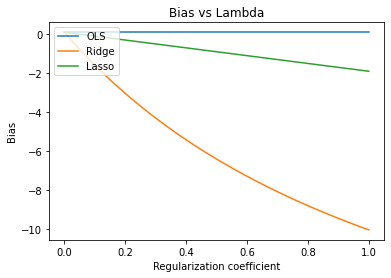

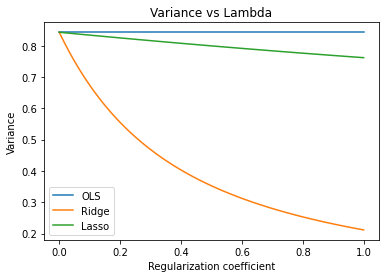

In [872]:
def driver():
  all_lambda = np.linspace(0.0001, 1, 100)
  all_bias = np.zeros(shape=(len(all_lambda), 3))
  all_variance = np.zeros(shape=(len(all_lambda), 3))
  dataset = gen_data()
  X_test = np.array([4]).reshape((1,1))
  for i, l in enumerate(all_lambda):
      Y_hat = make_prediction(dataset, X_test, lambda_=l)
      ##TODO #calculate true mean Y_true
      Y_true=m*X_test+c
      ##END TODO
      all_bias[i, :], all_variance[i, :] = gen_bais_variance(Y_hat, Y_true) 
  plot_figure(all_lambda, all_bias, all_variance)

driver()

# Perceptron

In [873]:
X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass = split_data(X_multi_class, Y_multi_class, train_ratio=0.6)

def perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass,n_class=3, epochs=30):
  W=np.zeros((n_class, len(X_train_multiclass[0]) ))
  ## TODO
  for c in range(epochs):
    for d in range(X_train_multiclass.shape[0]):
      A = np.matmul(W,np.transpose(X_train_multiclass[d]))
      k=A[0]
      j=0
      for a in range(n_class):
        if(A[a]>k):
          k=A[a]
          j=a
      if(Y_multi_class[d]!=j):
        W[Y_train_multiclass[d]]= W[Y_train_multiclass[d]]+X_train_multiclass[d]
        W[j]= W[j]-X_train_multiclass[d]
  ##END TODO

  Y_pred=list()
  for i in range(len(Y_val_multiclass)):
      y_pred=np.argmax([np.dot(W[0],X_val_multiclass[i]),np.dot(W[1],X_val_multiclass[i]),np.dot(W[2],X_val_multiclass[i])])
      Y_pred.append(y_pred)

  from sklearn.metrics import classification_report
  target_names = ['class 0', 'class 1', 'class 2']
  print(classification_report(Y_val_multiclass, Y_pred, target_names=target_names))
  return W

perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass)


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       1.00      1.00      1.00        14
     class 2       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



array([[  7.38527419,   0.49277354],
       [-13.02075174,  13.40609507],
       [  5.63547756, -13.89886861]])